In [1]:
# Importamos librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [2]:
def make_meshgrid(x, y, h=.02):
    """Creamos una malla de puntos para trazar

    Parámetros
    ----------
    x: datos para basar la cuadrícula de malla del eje x
    y: datos para basar la cuadrícula de malla del eje y
    h: tamaño del paso en la malla
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [3]:
def plot_contours(ax, clf, xx, yy, **params):
    """Graficacion de la frontera de desición.

    Parámetros
    ----------
    ax: matplotlib axes object
    clf: clasificador
    xx: arreglo tipo malla
    yy: arreglo tipo malla
    params: diccionario de parámetros
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [4]:
# Importamos la informacion con la que trabajaremos
iris = datasets.load_iris()
# Tomamos las dos primeras caracteristicas.
X = iris.data[:, :2]
y = iris.target

In [5]:
# creamos una instancia de la SVM 
C = 1.0  # parametro de regularizacion de la SVM
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

In [6]:
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

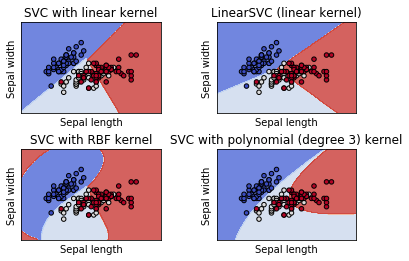

In [7]:
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()